In [2]:
# importing dependencies for mtcnn
import os
import cv2
import pandas as pd
from PIL import Image
import torch
from facenet_pytorch import MTCNN

# importing dependencies for dlib
import dlib
dlib.DLIB_USE_CUDA = True
from my_dlib_funcs import *
import numpy as np
import matplotlib.pyplot as plt
import shutil

ModuleNotFoundError: No module named 'my_dlib_funcs'

In [2]:
# empties crop queries folder after inference

def empty_folder(folder_path: str):
    if not os.path.isdir(folder_path):
        raise ValueError(f"{folder_path} is not a valid directory")
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)

In [19]:
# init mtcnn
device = torch.device("cpu")
mtcnn = MTCNN(keep_all = True, device = device)

# query crop storage
output_folder = "cropped_queries/"
uploaded_image = "final_test_scene3.png"

In [20]:
# supply the image to mtcnn
try:
    img = Image.open(uploaded_image).convert("RGB")
    boxes, _ = mtcnn.detect(img)
except Exception as e:
    print(f"Inference failed due to: {e}")

In [21]:
# save face crops to output folder
if boxes is not None:
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = [int(b) for b in box]
        cropped_face = img.crop((x1, y1, x2, y2))
        cropped_filename = f"crop_{i}_{uploaded_image}"
        cropped_path = os.path.join(output_folder, cropped_filename)
        print(cropped_path)
        cropped_face.save(cropped_path)

cropped_queries/crop_0_final_test_scene3.png
cropped_queries/crop_1_final_test_scene3.png
cropped_queries/crop_2_final_test_scene3.png
cropped_queries/crop_3_final_test_scene3.png
cropped_queries/crop_4_final_test_scene3.png
cropped_queries/crop_5_final_test_scene3.png
cropped_queries/crop_6_final_test_scene3.png
cropped_queries/crop_7_final_test_scene3.png


In [22]:
# setting up paths for persistant inference

cropped_queries = "cropped_queries/"
cnn_model_path = "models/mmod_human_face_detector.dat"
shape_predictor_path = "models/shape_predictor_68_face_landmarks_GTX.dat"
face_recognition_model_path = "models/dlib_face_recognition_resnet_model_v1.dat"

cnn_face_detector = dlib.cnn_face_detection_model_v1(cnn_model_path)
predictor = dlib.shape_predictor(shape_predictor_path)
face_rec = dlib.face_recognition_model_v1(face_recognition_model_path)

In [23]:
# readily moving on to query inference

gallery_df = pd.read_pickle("gallery_embeddings.pkl")
gallery_descriptors = gallery_df.to_dict(orient="records")
for row in gallery_descriptors:
    row["face descriptor"] = dlib.vector(row["face descriptor"])

In [24]:
query_descriptors = get_descriptors(imgs_path = cropped_queries, face_detector= cnn_face_detector, shape_predictor = predictor, face_recognizer = face_rec)
recognize(gallery_descriptors, query_descriptors)

Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 1
[np.float64(0.9227229098667105), np.float64(0.7803377392134756), np.float64(0.8699220555291581), np.float64(0.8699744212465682), np.float64(0.6879154126037172), np.float64(0.7518677905014937), np.float64(0.8088632147593634), np.float64(0.6761805622350354), np.float64(0.7309689882160413), np.float64(0.8992370204730387), np.float64(0.844323492493262), np.float64(0.8009840387873328), np.float64(0.8334749166357561), np.float64(0.9103596818163116), np.float64(0.8413086467548342), np.float64(0.7843468325188437), np.float64(0.5030366881991024), np.float64(0.7400641295754293), np.float64(0.7776283265141857), np.float64(0.8441415974058465), np.float64(0.8058738444564061)] 16
[np.float64(0.817519023441888), np.float64(0.7311379277443919), np.float64(0.7763021738777103), np.fl

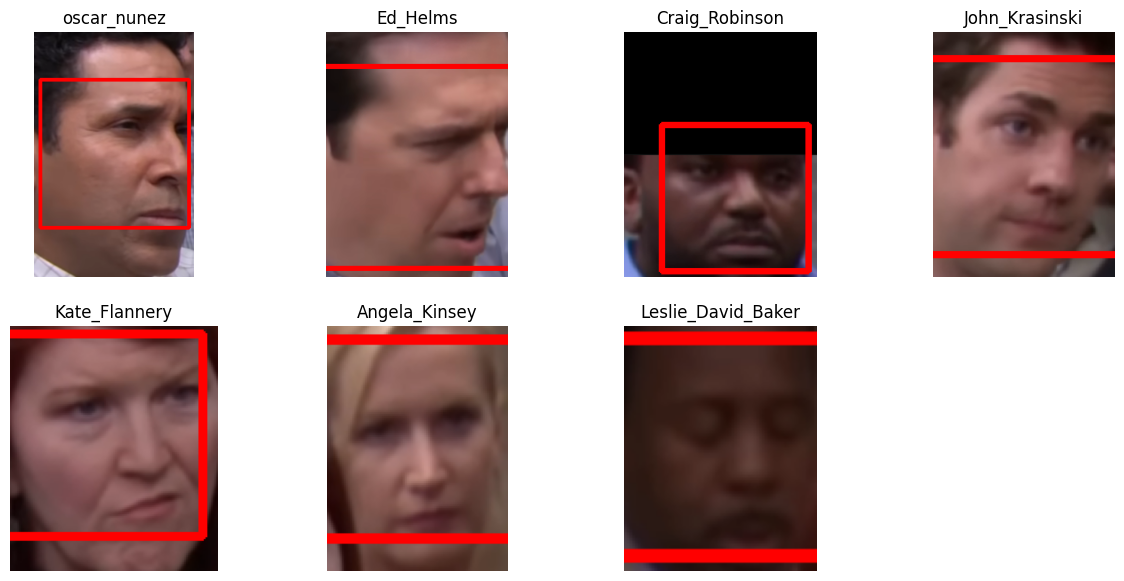

In [25]:
display(query_descriptors,save_output = True)
empty_folder(cropped_queries)